<a href="https://colab.research.google.com/github/madhukar1996/Practice_DL/blob/master/IndicBert_Language_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install sentencepiece
!pip install transformers[sentencepiece]
!pip install -U sentence-transformers

     |████████████████████████████████| 1.2 MB 5.0 MB/s 
     |████████████████████████████████| 3.5 MB 5.5 MB/s 
     |████████████████████████████████| 67 kB 5.0 MB/s 
     |████████████████████████████████| 895 kB 61.2 MB/s 
     |████████████████████████████████| 6.8 MB 68.4 MB/s 
     |████████████████████████████████| 596 kB 50.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 78 kB 3.3 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=120999 sha256=9951edc2a1aa33908cdfc4c2f39f51752835a08383019a618d7f6a15a291ec39
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers


In [4]:
import torch
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from transformers import AutoModel, AutoTokenizer
from transformers import BertTokenizer, BertModel
import matplotlib.pyplot as plt


In [5]:
torch.__version__

'1.10.0+cu111'

# Load Data

In [14]:
import json
def givequestions(file_path,n=float("inf")):
  j = json.load(open(file_path,'r'))
  data=[]
  i=0
  while(i<n and i<len(j["questions"])):
    data.append(j["questions"][i]["question"])
    i+=1
  return data

In [15]:
path="v2_OpenEnded_mscoco_test2015_hindi_questions_english_8000.json"
engdata=givequestions(path,100)

path="v2_OpenEnded_mscoco_test2015_hindi_questions_hindi_8000.json"
hindidata=givequestions(path,100)

path="v2_OpenEnded_mscoco_test2015_hindi_questions_bengali_8000.json"
bengalidata=givequestions(path,100)

path="v2_OpenEnded_mscoco_test2015_hindi_questions_punjabi_8000.json"
punjabidata=givequestions(path,100)

# Sentence similarity from different BERT models



In [6]:
import torch
device = "cuda:0" if torch.cuda.is_available() else "cpu"
print(device)


cpu


In [8]:
# def process_data(question):
#   question_ids = question
#   question_tags = question.new_zeros(question_ids.shape)
#   question_mask = (question > 0.5)
#   answer_ids = question_ids.new_zeros((question_ids.shape[0], 1)).fill_(1)
#   answer_mask = question_mask.new_zeros(answer_ids.shape).fill_(1)
#   q_end = question_mask.sum(1, keepdim=True)
#   a_end = q_end + answer_mask.sum(1, keepdim=True)
#   return (a_end - 2).squeeze(1)

# IndicBert


In [9]:
indic_tokenizer = AutoTokenizer.from_pretrained('ai4bharat/indic-bert')
indic_model = AutoModel.from_pretrained('ai4bharat/indic-bert',)
indic_model = indic_model.to(device)

Downloading:   0%|          | 0.00/507 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.38M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/129M [00:00<?, ?B/s]

Some weights of the model checkpoint at ai4bharat/indic-bert were not used when initializing AlbertModel: ['predictions.dense.bias', 'predictions.decoder.weight', 'sop_classifier.classifier.bias', 'predictions.decoder.bias', 'predictions.bias', 'predictions.dense.weight', 'predictions.LayerNorm.bias', 'sop_classifier.classifier.weight', 'predictions.LayerNorm.weight']
- This IS expected if you are initializing AlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [10]:
sbert_tokenizer = indic_tokenizer
sbert_model = indic_model


# Bert Base Multilingual


In [ ]:
Bert_tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
Bert_model = BertModel.from_pretrained("bert-base-multilingual-cased")
Bert_model = Bert_model.to(device)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# Sentence Bert
##  

In [ ]:
sbert_tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/stsb-xlm-r-multilingual')
sbert_model = AutoModel.from_pretrained('sentence-transformers/stsb-xlm-r-multilingual')
# sbert_tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/distiluse-base-multilingual-cased-v2')
# sbert_model = AutoModel.from_pretrained('sentence-transformers/distiluse-base-multilingual-cased-v2')
# sbert_tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')
# sbert_model = AutoModel.from_pretrained('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')

sbert_model = sbert_model.to(device)

In [ ]:
# from google.colab import drive
# drive.mount("/content/gdrive")

In [16]:
#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

In [17]:
def calculate_similarity(model,tokenizer,sentences):
  encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')
  # print(encoded_input)
  with torch.no_grad():
      model_output = model(**encoded_input)

  sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])
  if(device!="cpu"):
    sentence_embeddings=sentence_embeddings.to("cpu").detach().numpy()
  else:
    sentence_embeddings=sentence_embeddings.numpy()
  print("Cosine similarity")
  print(cosine_similarity(
    [sentence_embeddings[1]],
    sentence_embeddings
))

In [ ]:
sentences=['What sport is this?','यह कौन सा खेल है?','आप कैसे हैं','how are you']

In [ ]:
calculate_similarity(indic_model,indic_tokenizer,sentences)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Cosine similarity
[[0.5317951  1.0000002  0.605409   0.16156414]]


In [ ]:
calculate_similarity(Bert_model,Bert_tokenizer,sentences)

Cosine similarity
[[0.5826323  1.         0.5991933  0.38789153]]


In [ ]:
calculate_similarity(sbert_model,sbert_tokenizer,sentences)

Cosine similarity
[[0.81077564 0.9999999  0.30900395 0.312779  ]]


In [18]:
engdata[0:3],hindidata[0:3]

(['Is the ball flying towards the batter?',
  'What sport is this?',
  'Can you see the ball?'],
 ['क्या गेंद बल्लेबाज की ओर उड़ रही है?',
  'यह कौन सा खेल है?',
  'क्या आप गेंद को देख सकते हैं?'])

In [19]:
def getembeddings(model,tokenizer,sentences):
  encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')
  with torch.no_grad():
      model_output = model(**encoded_input)

  sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])
  if(device!="cpu"):
    sentence_embeddings=sentence_embeddings.to("cpu").detach().numpy()
  else:
    sentence_embeddings=sentence_embeddings.numpy()
  return sentence_embeddings

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


average similarity  0.5177672


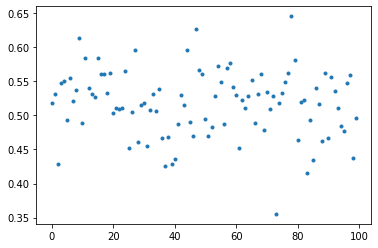

In [15]:
eng_embed=getembeddings(indic_model,indic_tokenizer,engdata)
hind_embed=getembeddings(indic_model,indic_tokenizer,hindidata)
nm=(np.linalg.norm(eng_embed,axis=1))
nm=nm.reshape(-1,1)
eng_embed=eng_embed/nm
nm=(np.linalg.norm(hind_embed,axis=1))
nm=nm.reshape(-1,1)
hind_embed=hind_embed/nm
res=np.multiply(eng_embed,hind_embed)
res1=res.sum(axis=1)
print("average similarity ",res1.mean())
plt.plot(res1,".")

average similarity  0.53551173


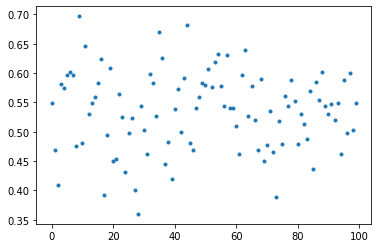

In [16]:
eng_embed=getembeddings(sbert_model,sbert_tokenizer,bengalidata)
hind_embed=getembeddings(sbert_model,sbert_tokenizer,engdata)
nm=(np.linalg.norm(eng_embed,axis=1))
nm=nm.reshape(-1,1)
eng_embed=eng_embed/nm
nm=(np.linalg.norm(hind_embed,axis=1))
nm=nm.reshape(-1,1)
hind_embed=hind_embed/nm
res=np.multiply(eng_embed,hind_embed)
res2=res.sum(axis=1)
print("average similarity ",res2.mean())
plt.plot(res2,".")

# Lets reverse the data so that it won't match and see the graph

average similarity  0.49908504


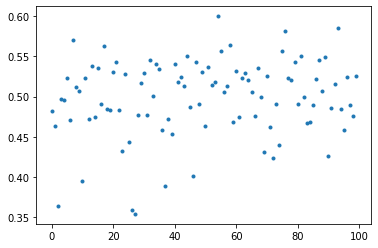

In [17]:
eng_embed=getembeddings(indic_model,indic_tokenizer,engdata)
hind_embed=getembeddings(indic_model,indic_tokenizer,hindidata[::-1])
nm=(np.linalg.norm(eng_embed,axis=1))
nm=nm.reshape(-1,1)
eng_embed=eng_embed/nm
nm=(np.linalg.norm(hind_embed,axis=1))
nm=nm.reshape(-1,1)
hind_embed=hind_embed/nm
res=np.multiply(eng_embed,hind_embed)
res1=res.sum(axis=1)
print("average similarity ",res1.mean())
plt.plot(res1,".")

average similarity  0.49908504


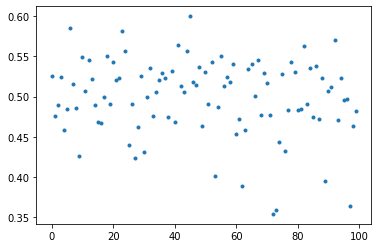

In [18]:
eng_embed=getembeddings(sbert_model,sbert_tokenizer,engdata[::-1])
hind_embed=getembeddings(sbert_model,sbert_tokenizer,hindidata)
nm=(np.linalg.norm(eng_embed,axis=1))
nm=nm.reshape(-1,1)
eng_embed=eng_embed/nm
nm=(np.linalg.norm(hind_embed,axis=1))
nm=nm.reshape(-1,1)
hind_embed=hind_embed/nm
res=np.multiply(eng_embed,hind_embed)
res2=res.sum(axis=1)
print("average similarity ",res2.mean())
plt.plot(res2,".")

# Testing different multilingual models

In [21]:
def func(sbert_tokenizer,sbert_model,engdata,hindidata):
  eng_embed=getembeddings(sbert_model,sbert_tokenizer,engdata)
  hind_embed=getembeddings(sbert_model,sbert_tokenizer,hindidata)
  nm=(np.linalg.norm(eng_embed,axis=1))
  nm=nm.reshape(-1,1)
  eng_embed=eng_embed/nm
  nm=(np.linalg.norm(hind_embed,axis=1))
  nm=nm.reshape(-1,1)
  hind_embed=hind_embed/nm
  res=np.multiply(eng_embed,hind_embed)
  res2=res.sum(axis=1)
  print("average similarity ",res2.mean())
  plt.plot(res2,".")

In [26]:
sbert_tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/paraphrase-multilingual-mpnet-base-v2')
sbert_model = AutoModel.from_pretrained('sentence-transformers/paraphrase-multilingual-mpnet-base-v2')
sbert_model = sbert_model.to(device)

average similarity  0.06838492


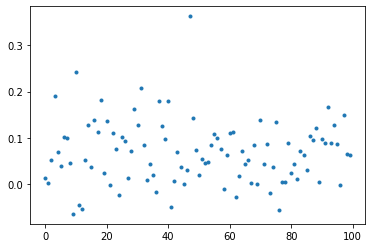

In [57]:
func(sbert_tokenizer,sbert_model,engdata,hindidata)

average similarity  0.0068665547


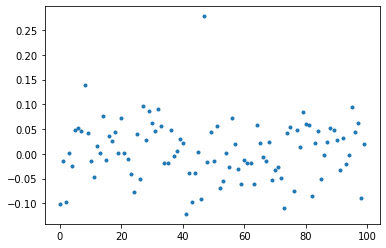

In [58]:
func(sbert_tokenizer,sbert_model,engdata,bengalidata)

average similarity  0.10853705


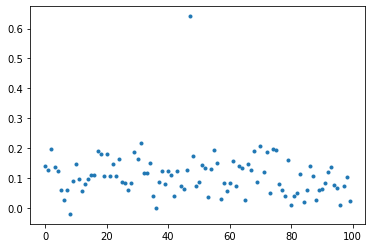

In [59]:
func(sbert_tokenizer,sbert_model,engdata,punjabidata)

In [20]:
def fun(tokenizer,data):
  tokens=tokenizer.tokenize(data)
  ttoi=tokenizer.convert_tokens_to_ids(tokens)
  itot=tokenizer.convert_ids_to_tokens(ttoi)
  print(data)
  print(tokens)
  print(ttoi)
  print(itot)



In [6]:
sbert_tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/paraphrase-multilingual-mpnet-base-v2')
sbert_model = AutoModel.from_pretrained('sentence-transformers/paraphrase-multilingual-mpnet-base-v2')
sbert_model = sbert_model.to(device)

Downloading:   0%|          | 0.00/402 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/723 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/8.66M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

NameError: ignored

In [32]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
cd gdrive/MyDrive/sbert_paraphrase_multilingual_mpnet_base_v2_model

In [7]:
sbert_model.save_pretrained("./")

In [8]:
sbert_tokenizer.save_pretrained("./")

('./tokenizer_config.json',
 './special_tokens_map.json',
 './sentencepiece.bpe.model',
 './added_tokens.json',
 './tokenizer.json')

In [34]:
sbert_model.save_pretrained("./gdrive/MyDrive/sbert_paraphrase_multilingual_mpnet_base_v2_model")

In [35]:
sbert_tokenizer.save_pretrained("./gdrive/MyDrive/sbert_paraphrase_multilingual_mpnet_base_v2_tokenizer")

('./gdrive/MyDrive/sbert_paraphrase_multilingual_mpnet_base_v2_tokenizer/tokenizer_config.json',
 './gdrive/MyDrive/sbert_paraphrase_multilingual_mpnet_base_v2_tokenizer/special_tokens_map.json',
 './gdrive/MyDrive/sbert_paraphrase_multilingual_mpnet_base_v2_tokenizer/sentencepiece.bpe.model',
 './gdrive/MyDrive/sbert_paraphrase_multilingual_mpnet_base_v2_tokenizer/added_tokens.json',
 './gdrive/MyDrive/sbert_paraphrase_multilingual_mpnet_base_v2_tokenizer/tokenizer.json')

In [23]:
fun(sbert_tokenizer,engdata[0])

Is the ball flying towards the batter?
['is', 'the', 'ball', 'flying', 'towards', 'the', 'batter', '?']
[2007, 2000, 3612, 3913, 2879, 2000, 23805, 1033]
['is', 'the', 'ball', 'flying', 'towards', 'the', 'batter', '?']


In [24]:
fun(sbert_tokenizer,hindidata[0])

क्या गेंद बल्लेबाज की ओर उड़ रही है?
['क', '##य', '##ा', 'ग', '##द', 'ब', '##ल', '##ल', '##ब', '##ा', '##ज', 'क', '##ी', '[UNK]', 'उ', '##ड', 'र', '##ह', '##ी', 'ह', '?']
[1319, 29872, 29880, 1321, 29865, 1333, 29874, 29874, 29869, 29880, 29859, 1319, 29882, 104, 1317, 29861, 1337, 29879, 29882, 1343, 1033]
['क', '##य', '##ा', 'ग', '##द', 'ब', '##ल', '##ल', '##ब', '##ा', '##ज', 'क', '##ी', '[UNK]', 'उ', '##ड', 'र', '##ह', '##ी', 'ह', '?']


In [25]:
fun(sbert_tokenizer,bengalidata[0])

বল কি বাটার দিকে উড়ছে?
['ব', '##ল', 'ক', '##ি', 'ব', '##া', '##ট', '##া', '##র', 'দ', '##ি', '##ক', '##ে', 'উ', '##ড', '##ছ', '##ে', '?']
[1372, 29913, 1357, 29919, 1372, 29918, 29899, 29918, 29912, 1368, 29919, 29893, 29921, 1354, 29900, 29897, 29921, 1033]
['ব', '##ল', 'ক', '##ি', 'ব', '##া', '##ট', '##া', '##র', 'দ', '##ি', '##ক', '##ে', 'উ', '##ড', '##ছ', '##ে', '?']


In [26]:
fun(sbert_tokenizer,punjabidata[0])

ਕੀ ਗੇਂਦ ਬੱਟਰ ਵੱਲ ਉੱਡ ਰਹੀ ਹੈ?
['[UNK]', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '?']
[104, 104, 104, 104, 104, 104, 104, 1033]
['[UNK]', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '?']


In [30]:
list(sbert_tokenizer.vocab)

['falls', 'platforms']

# Tokenization for paraphrase-multilingual-mpnet-base-v2

In [89]:
fun(sbert_tokenizer,engdata[0])

Is the ball flying towards the batter?
['▁Is', '▁the', '▁ball', '▁fly', 'ing', '▁towards', '▁the', '▁bat', 'ter', '?']
[2071, 70, 16446, 12403, 214, 98186, 70, 1777, 720, 32]
['▁Is', '▁the', '▁ball', '▁fly', 'ing', '▁towards', '▁the', '▁bat', 'ter', '?']


In [90]:
fun(sbert_tokenizer,hindidata[0])

क्या गेंद बल्लेबाज की ओर उड़ रही है?
['▁क्या', '▁गेंद', '▁बल्लेबाज', '▁की', '▁ओर', '▁उड़', '▁रही', '▁है', '?']
[6004, 192387, 184178, 471, 39257, 118891, 8906, 460, 32]
['▁क्या', '▁गेंद', '▁बल्लेबाज', '▁की', '▁ओर', '▁उड़', '▁रही', '▁है', '?']


In [91]:
fun(sbert_tokenizer,bengalidata[0])

বল কি বাটার দিকে উড়ছে?
['▁বল', '▁কি', '▁বা', 'টার', '▁দিকে', '▁উ', 'ড়', 'ছে', '?']
[41894, 14403, 7802, 58065, 96242, 16447, 24845, 12814, 32]
['▁বল', '▁কি', '▁বা', 'টার', '▁দিকে', '▁উ', 'ড়', 'ছে', '?']


In [92]:
fun(sbert_tokenizer,punjabidata[0])

ਕੀ ਗੇਂਦ ਬੱਟਰ ਵੱਲ ਉੱਡ ਰਹੀ ਹੈ?
['▁ਕੀ', '▁', 'ਗੇ', 'ਂ', 'ਦ', '▁ਬੱ', 'ਟਰ', '▁ਵੱਲ', '▁ਉੱ', 'ਡ', '▁ਰਹੀ', '▁ਹੈ', '?']
[27680, 6, 29185, 20270, 6852, 106714, 28324, 143513, 186464, 7542, 42434, 1406, 32]
['▁ਕੀ', '▁', 'ਗੇ', 'ਂ', 'ਦ', '▁ਬੱ', 'ਟਰ', '▁ਵੱਲ', '▁ਉੱ', 'ਡ', '▁ਰਹੀ', '▁ਹੈ', '?']


# Tokenization for LaBSE

In [83]:
fun(sbert_tokenizer,engdata[0])

Is the ball flying towards the batter?
['Is', 'the', 'ball', 'flying', 'towards', 'the', 'batter', '?']
[15872, 14985, 28626, 92539, 40141, 14985, 210848, 136]
['Is', 'the', 'ball', 'flying', 'towards', 'the', 'batter', '?']


In [84]:
fun(sbert_tokenizer,hindidata[0])

क्या गेंद बल्लेबाज की ओर उड़ रही है?
['क्या', 'गेंद', 'बल्लेबाज', 'की', 'ओर', 'उ', '##ड़', 'रही', 'है', '?']
[19665, 155866, 311411, 15161, 29193, 1157, 53932, 19550, 15107, 136]
['क्या', 'गेंद', 'बल्लेबाज', 'की', 'ओर', 'उ', '##ड़', 'रही', 'है', '?']


In [85]:
fun(sbert_tokenizer,bengalidata[0])

বল কি বাটার দিকে উড়ছে?
['বল', 'কি', 'বা', '##টার', 'দিকে', 'উ', '##ড়', '##ছে', '?']
[74123, 18436, 17046, 46437, 28355, 1253, 55426, 22921, 136]
['বল', 'কি', 'বা', '##টার', 'দিকে', 'উ', '##ড়', '##ছে', '?']


In [86]:
fun(sbert_tokenizer,punjabidata[0])

ਕੀ ਗੇਂਦ ਬੱਟਰ ਵੱਲ ਉੱਡ ਰਹੀ ਹੈ?
['ਕੀ', 'ਗ', '##ੇ', '##ਂਦ', 'ਬ', '##ੱਟ', '##ਰ', 'ਵੱਲ', 'ਉ', '##ੱਡ', 'ਰਹੀ', 'ਹੈ', '?']
[21848, 1341, 17810, 415130, 1361, 106852, 19689, 54810, 1333, 169916, 24757, 15312, 136]
['ਕੀ', 'ਗ', '##ੇ', '##ਂਦ', 'ਬ', '##ੱਟ', '##ਰ', 'ਵੱਲ', 'ਉ', '##ੱਡ', 'ਰਹੀ', 'ਹੈ', '?']


In [ ]:
eng.shape,hindi.shape,bengali.shape,punjabi.shape

In [ ]:
i=1
print(engdata[i],hindidata[i+29])
u=eng[i].reshape(1,-1)
v=hindi[i+2].reshape(-1,1)
print(np.dot(u,v)/(np.linalg.norm(u)*np.linalg.norm(v)))


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
ans=[]
for i in range(100):
  ans.append(cosine_similarity(eng[i].reshape(1,-1),hindi[i].reshape(1,-1))[0][0])
plt.plot(ans,".")

In [ ]:
ans=[]
for i in range(100):
  ans.append(cosine_similarity(eng[i].reshape(1,-1),hindi[99-i].reshape(1,-1))[0][0])
plt.plot(ans,".")

In [ ]:
cosine_similarity(eng,hindi)

In [ ]:
cosine_similarity(eng,bengali)

In [ ]:
cosine_similarity(punjabi,punjabi)

In [ ]:
# new work

In [ ]:
path="v2_OpenEnded_mscoco_test2015_hindi_questions_english_8000.json"
english=givequestions(path,100)
path="v2_OpenEnded_mscoco_test2015_hindi_questions_hindi_8000.json"
hindi=givequestions(path,100)

In [ ]:
!pip install -U sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer
embedder = SentenceTransformer('sentence-transformers/distiluse-base-multilingual-cased-v2')
embeddings = embedder.encode(['Hello World', 'Hallo Welt', 'Hola mundo'])
print(embeddings)

In [ ]:
sent=['What sport is this?','यह कौन सा खेल है?','आप कैसे हैं','how are you']
mac=embedder.encode(txt)

In [ ]:
cosine_similarity(
    [mac[2]],
    mac
)

In [ ]:
eng=embedder.encode(english)
hind=embedder.encode(hindi)

In [ ]:
ans=[]
for i in range(100):
  ans.append(cosine_similarity(eng[i].reshape(1,-1),hind[i].reshape(1,-1))[0][0])
ans=np.array(ans)
plt.plot(ans,".")

In [ ]:
ans=[]
for i in range(100):
  ans.append(cosine_similarity(eng[i].reshape(1,-1),hind[99-i].reshape(1,-1))[0][0])
ans=np.array(ans)
plt.plot(ans,".")

In [ ]:
from sentence_transformers import SentenceTransformer
# sentences = ["This is an example sentence", "Each sentence is converted"]

model1 = SentenceTransformer('sentence-transformers/stsb-xlm-r-multilingual')


In [ ]:
embeddings1 = model1.encode(sentences)
print(embeddings1)

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch


#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)


# Sentences we want sentence embeddings for
# sentences = ['This is an example sentence', 'Each sentence is converted']

# Load model from HuggingFace Hub
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = BertModel.from_pretrained("bert-base-multilingual-cased")
# tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/stsb-xlm-r-multilingual')
# model = AutoModel.from_pretrained('sentence-transformers/stsb-xlm-r-multilingual')

# Tokenize sentences


In [ ]:
encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')

# Compute token embeddings
with torch.no_grad():
    model_output = model(**encoded_input)

# Perform pooling. In this case, max pooling.
sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

print("Sentence embeddings:")
print(sentence_embeddings)
sentence_embeddings=sentence_embeddings.numpy()

In [ ]:
cosine_similarity(
    [embeddings1[2]],
    embeddings1
)

In [ ]:
cosine_similarity(
    [sentence_embeddings[2]],
    sentence_embeddings
)